<a href="https://colab.research.google.com/github/BenStanley13/MAT421/blob/main/MAT421_HW_H_22_4%2C22_5%2C22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework H

## Section 22.4: Numerical Error and Instability

There are two main issues to consider with regard to integration schemes for ODEs: accuracy and stability. Accuracy refers to a scheme’s ability to get close to the exact solution, which is usually unknown, as a function of the step size h.  The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable. Some integration schemes are stable for certain choices of h
 and unstable for others; these integration schemes are also referred to as unstable.

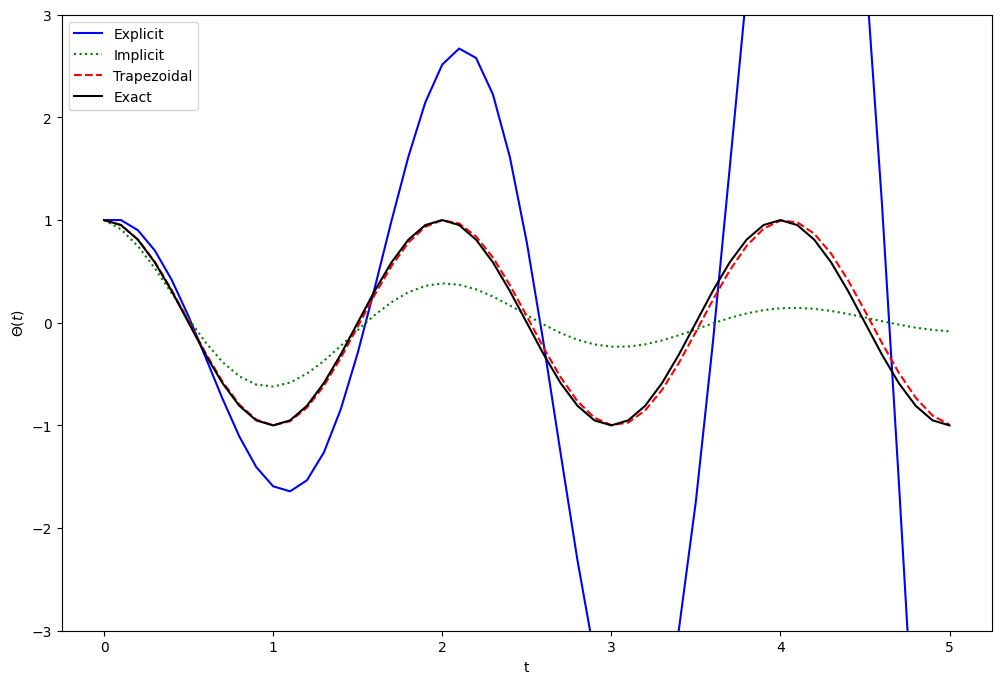

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = np.pi
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

## Section 22.5: Predictor-Corrector and Runge Kutta Methods

Given any time and state value, the function, F(t,S(t))
, returns the change of state dS(t)dt
. Predictor-corrector methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the F
 function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state.

 Essentially, it uses two formulas: the predictor and corrector. The predictor is an explicit formula and first estimates the solution at tj+1
, i.e. we can use Euler method or some other methods to finish this step. After we obtain the solution S(tj+1)
, we can apply the corrector to improve the accuracy. Using the found S(tj+1)
 on the right-hand side of an otherwise implicit formula, the corrector can calculate a new, more accurate solution.

 The midpoint method has a predictor step:

S(tj+h2)=S(tj)+h2F(tj,S(tj)),

which is the prediction of the solution value halfway between tj
 and tj+1.

It then computes the corrector step:

S(tj+1)=S(tj)+hF(tj+h2,S(tj+h2))

which computes the solution at S(tj+1)
 from S(tj)
 but using the derivative from S(tj+h2)
.

### Runge Kutta Methods

Runge Kutta (RK) methods are one of the most widely used methods for solving ODEs. Recall that the Euler method uses the first two terms in Taylor series to approximate the numerical integration, which is linear:

S(tj+1)=S(tj+h)=S(tj)+h⋅S′(tj)

We can greatly improve the accuracy of numerical integration if we keep more terms of the series in

S(tj+1)=S(tj+h)=S(tj)+S′(tj)h+1/2!S′′(tj)h^2+⋯+1/n!*S^(n)(tj)h^n

## 22.6: Python ODE Solver

In scipy, there are several built-in functions for solving initial value problems.



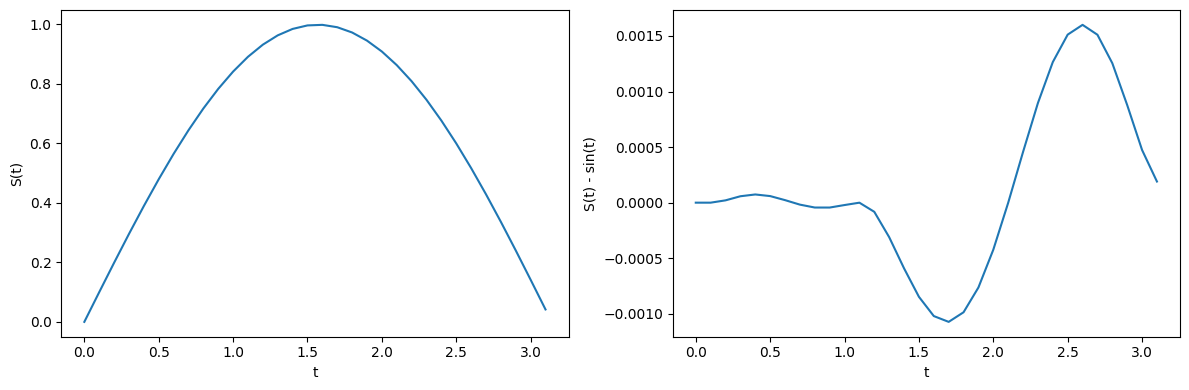

In [6]:
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

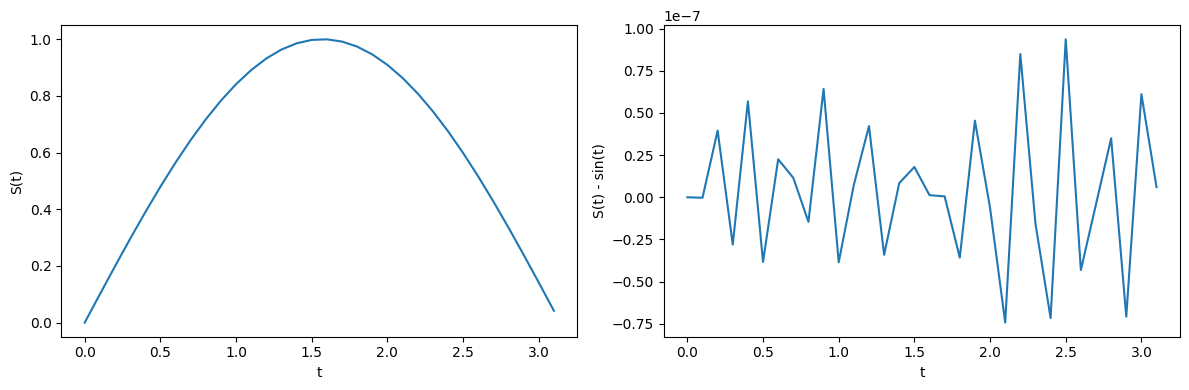

In [7]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

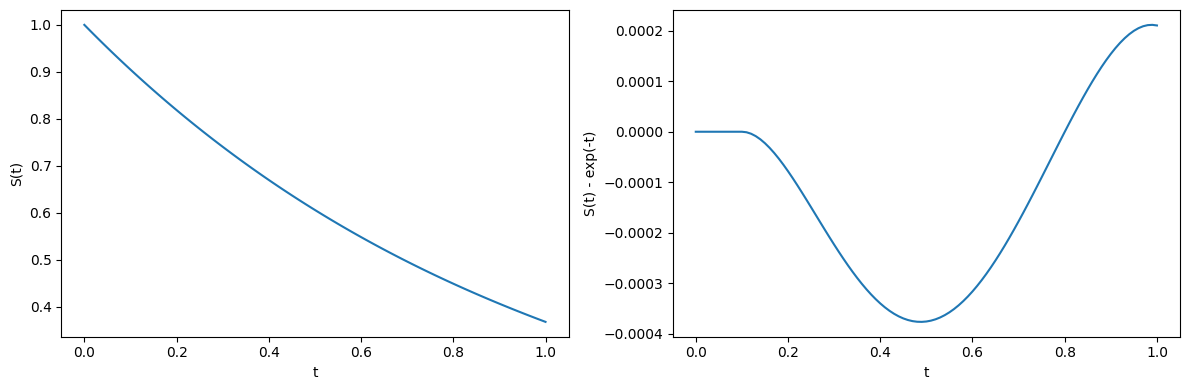

In [8]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

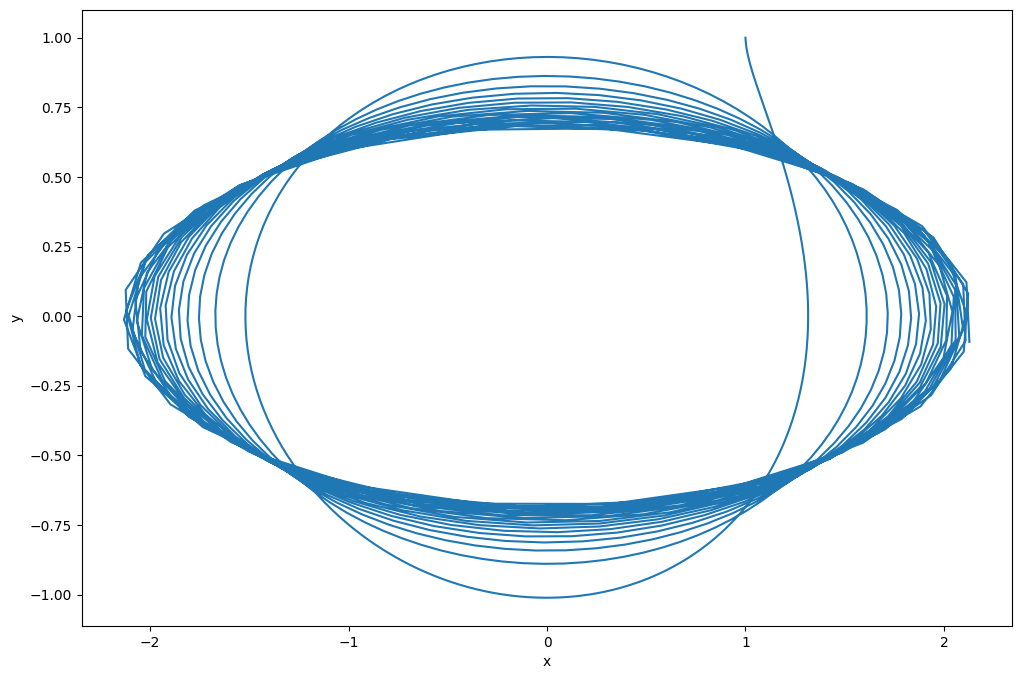

In [9]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()